In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Item-Based Recommendation

**Contents**

- [The MovieLens dataset](#1.-The-MovieLens-dataset)
- [The movie recommendation problem](#2.-The-movie-recommendation-problem)
- [Recommendations based on rating counts](#3.-Recommendations-based-on-rating-counts)
    - [Jaccard Similarity](#3.1.-Jaccard-similarity)
    - [Serendipity Similiarity](#3.2.-Serendipity-similarity)
- [Recommendations based on ratings]()
    - [Euclidean distance]()
    - [Cosine distance]()
    - [Correlation distance]()

## 1. The MovieLens dataset

We’ll be working with the MovieLens dataset, a common benchmark dataset for recommendation system algorithms. 
The dataset contains 100,000 ratings and 3,600 tag applications applied to 9,724 movies by 610 users.

In [58]:
ratings = pd.read_csv('https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/ratings.csv')
ratings

,userId,movieId,rating,timestamp,title
0,1,1,4.0,964982703,Toy Story (1995)
1,1,3,4.0,964981247,Grumpier Old Men (1995)
2,1,6,4.0,964982224,Heat (1995)
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995)
4,1,50,5.0,964982931,"Usual Suspects, The (1995)"
...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017)
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017)
100833,610,168250,5.0,1494273047,Get Out (2017)
100834,610,168252,5.0,1493846352,Logan (2017)


In [3]:
# number of ratings
len(ratings)

100836

In [4]:
# number of users
len(ratings['userId'].unique())

610

In [9]:
# number of movies
len(ratings['title'].unique())

9719

In [8]:
# list of all movies
list(ratings['title'])

['Toy Story (1995)',
 'Grumpier Old Men (1995)',
 'Heat (1995)',
 'Seven (a.k.a. Se7en) (1995)',
 'Usual Suspects, The (1995)',
 'From Dusk Till Dawn (1996)',
 'Bottle Rocket (1996)',
 'Braveheart (1995)',
 'Rob Roy (1995)',
 'Canadian Bacon (1995)',
 'Desperado (1995)',
 'Billy Madison (1995)',
 'Clerks (1994)',
 'Dumb & Dumber (Dumb and Dumber) (1994)',
 'Ed Wood (1994)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Pulp Fiction (1994)',
 'Stargate (1994)',
 'Tommy Boy (1995)',
 'Clear and Present Danger (1994)',
 'Forrest Gump (1994)',
 'Jungle Book, The (1994)',
 'Mask, The (1994)',
 'Blown Away (1994)',
 'Dazed and Confused (1993)',
 'Fugitive, The (1993)',
 'Jurassic Park (1993)',
 'Mrs. Doubtfire (1993)',
 "Schindler's List (1993)",
 'So I Married an Axe Murderer (1993)',
 'Three Musketeers, The (1993)',
 'Tombstone (1993)',
 'Dances with Wolves (1990)',
 'Batman (1989)',
 'Silence of the Lambs, The (1991)',
 'Pinocchio (1940)',
 'Fargo (1996)',
 'Mission: Impossible (1996)',

In [10]:
# ratings
np.sort(ratings['rating'].unique())

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

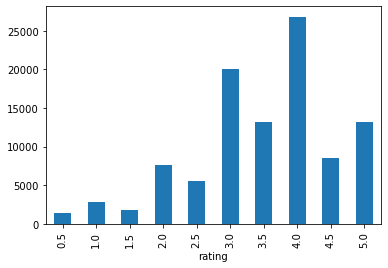

In [12]:
# rating distribution
ratings.groupby('rating')['rating'].count().plot(kind='bar')

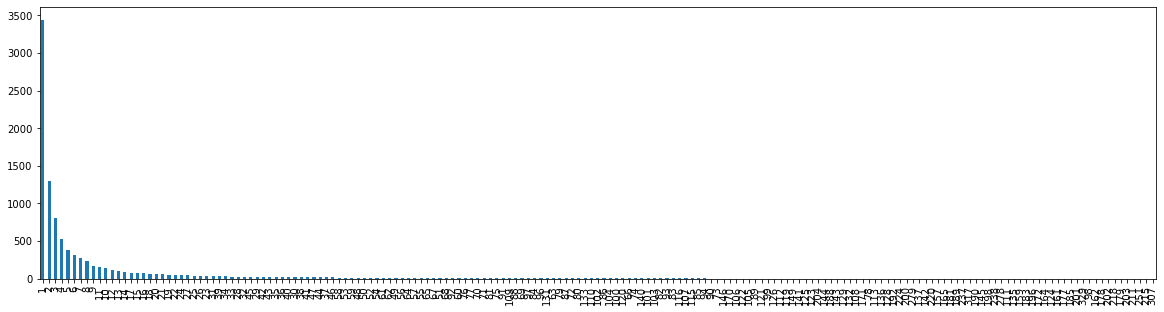

In [34]:
# number of ratings distribution
ratings.groupby('title')['rating'].apply(len).value_counts().plot(kind='bar', figsize=(20,5))

## 2. The movie recommendation problem

Suppose a **new user** watches the movie

In [52]:
movie = 'Dark City (1998)' # fantasy, sci-fi movie; similar to 'the matrix'

the goal is to recommend new movies to this user.

**Item-based recommendations** are calculated based on the similarity between items (movies) using people’s ratings on those items.

Let's create a pandas DataFrame that contains the set of user that have rated each movie.

In [35]:
movie_sets = ratings.groupby('title')['userId'].apply(set)
movie_sets

title
'71 (2014)                                                                               {610}
'Hellboy': The Seeds of Creation (2004)                                                  {332}
'Round Midnight (1986)                                                              {377, 332}
'Salem's Lot (2004)                                                                      {345}
'Til There Was You (1997)                                                           {345, 113}
                                                                   ...                        
eXistenZ (1999)                              {387, 391, 520, 267, 414, 425, 560, 182, 312, ...
xXx (2002)                                   {263, 9, 140, 274, 20, 414, 432, 182, 438, 448...
xXx: State of the Union (2005)                                       {610, 232, 432, 274, 382}
¡Three Amigos! (1986)                        {1, 141, 19, 282, 27, 414, 421, 294, 42, 555, ...
À nous la liberté (Freedom for Us) (1931)   

In [46]:
# keep movies with at least 10 ratings
movie_sets = movie_sets[movie_sets.apply(len)>10]

## 3. Recommendations based on rating counts

### 3.1. Jaccard similarity

The **Jaccard Index** measures the similarity between two sets A and B as the size of the intersection divided by the size of the union

$$
J(A,B) = \frac{|A\cap B|}{|A\cup B|}
$$

In [54]:
def Jaccard_sim(set_B):
    set_A = movie_sets[movie]
    return len(set_A.intersection(set_B))/len(set_A.union(set_B))

In [55]:
# top 20 recommendations
movie_sets.apply(Jaccard_sim).sort_values(ascending=False).head(20)

title
Dark City (1998)                              1.000000
Akira (1988)                                  0.359375
Alien: Resurrection (1997)                    0.309859
Spaceballs (1987)                             0.304878
Batman Returns (1992)                         0.301205
Mystery Men (1999)                            0.298507
Gremlins (1984)                               0.289855
Brazil (1985)                                 0.289157
Unbreakable (2000)                            0.287234
2001: A Space Odyssey (1968)                  0.286885
Close Encounters of the Third Kind (1977)     0.285714
Pi (1998)                                     0.283784
Mad Max (1979)                                0.283582
Total Recall (1990)                           0.283019
RoboCop (1987)                                0.282609
Dark Crystal, The (1982)                      0.281250
Gattaca (1997)                                0.276190
Blade Runner (1982)                           0.274074
Fift

### 3.2. Serendipity similarity

The **Serendipity Index** measures the similarity between two sets A and B as the size of the intersection divided by the size of the set B

$$
J(A,B) = \frac{|A\cap B|}{|B|}
$$

In [56]:
def Serendipity_sim(set_B):
    set_A = movie_sets[movie]
    return len(set_A.intersection(set_B))/len(set_B)

In [57]:
movie_sets.apply(Serendipity_sim).sort_values(ascending=False).head(20)

title
Dark City (1998)                        1.000000
Fallen (1998)                           0.733333
Zero Effect (1998)                      0.733333
Death to Smoochy (2002)                 0.727273
Michael Collins (1996)                  0.727273
Solaris (Solyaris) (1972)               0.727273
Replacement Killers, The (1998)         0.714286
Mimic (1997)                            0.692308
Ninja Scroll (Jûbei ninpûchô) (1995)    0.692308
Yojimbo (1961)                          0.692308
Brick (2005)                            0.666667
Of Mice and Men (1992)                  0.647059
Universal Soldier (1992)                0.647059
Cape Fear (1962)                        0.642857
Limey, The (1999)                       0.642857
BASEketball (1998)                      0.642857
Saving Silverman (Evil Woman) (2001)    0.636364
Shadow of the Vampire (2000)            0.636364
Blood Simple (1984)                     0.631579
Soylent Green (1973)                    0.631579
Name: userId, 

## 4. Recommendations based on ratings

### 4.1. Euclidean distance

### 4.2. Cosine distance

### 4.3 Correlation distance